In [1]:
import pandas as pd
import time
from denmune import DenMune

using NGT, Proximity matrix has been calculated  in:  0.002964019775390625  seconds


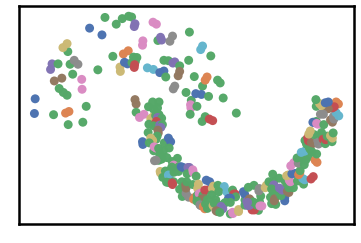

k= 1 :Validity score is: 0.3618319710010029 but best score is 0.3618319710010029 where k= 1     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.0031168460845947266  seconds


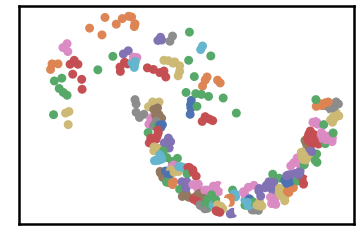

k= 2 :Validity score is: 0.1142039430014741 but best score is 0.3618319710010029 where k= 1     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.003188610076904297  seconds


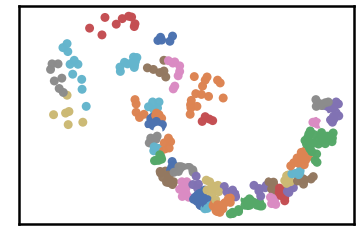

k= 3 :Validity score is: 0.15552130458822808 but best score is 0.3618319710010029 where k= 1     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.0052111148834228516  seconds


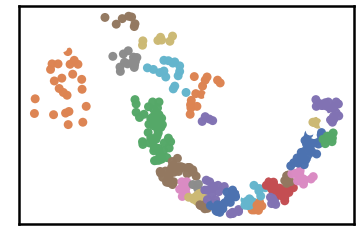

k= 4 :Validity score is: 0.33430436583186207 but best score is 0.3618319710010029 where k= 1     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.003597736358642578  seconds


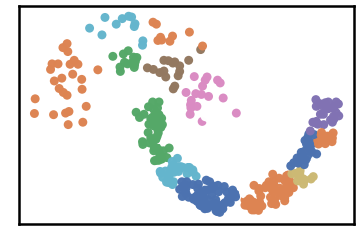

k= 5 :Validity score is: 0.3252818002827062 but best score is 0.3618319710010029 where k= 1     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.003602743148803711  seconds


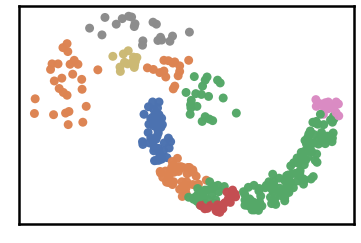

k= 6 :Validity score is: 0.49479283629096166 but best score is 0.49479283629096166 where k= 6     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.004067420959472656  seconds


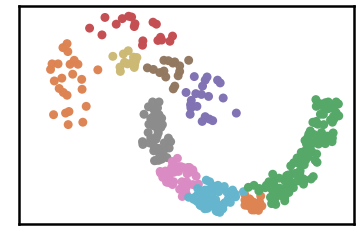

k= 7 :Validity score is: 0.5303473057065475 but best score is 0.5303473057065475 where k= 7     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.003714323043823242  seconds


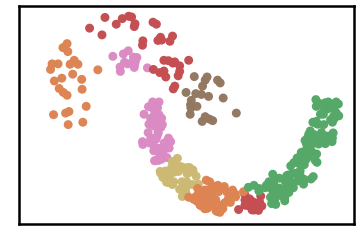

k= 8 :Validity score is: 0.5303473057065475 but best score is 0.5303473057065475 where k= 7     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.005576372146606445  seconds


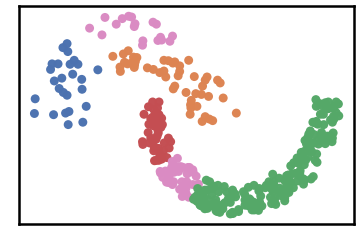

k= 9 :Validity score is: 0.5650927617291178 but best score is 0.5650927617291178 where k= 9     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.005659341812133789  seconds


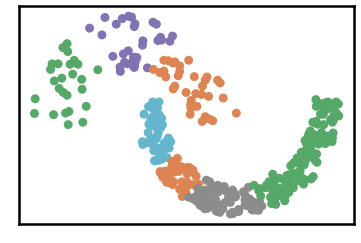

k= 10 :Validity score is: 0.5650927617291178 but best score is 0.5650927617291178 where k= 9     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.004494190216064453  seconds


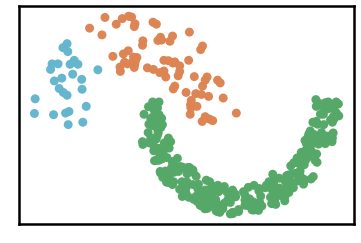

k= 11 :Validity score is: 0.9525543343949469 but best score is 0.9525543343949469 where k= 11     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.004797458648681641  seconds


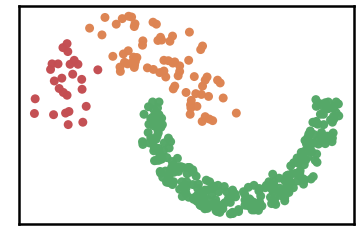

k= 12 :Validity score is: 0.9525543343949469 but best score is 0.9525543343949469 where k= 11     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.004803895950317383  seconds


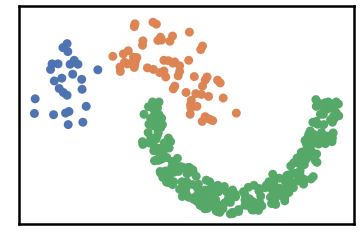

k= 13 :Validity score is: 0.9393375374258822 but best score is 0.9525543343949469 where k= 11     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.004927873611450195  seconds


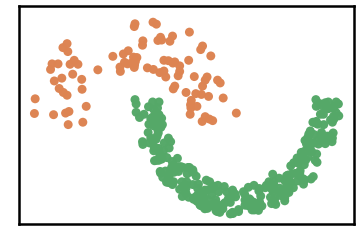

k= 14 :Validity score is: 0.9466970842422527 but best score is 0.9525543343949469 where k= 11     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.004960298538208008  seconds


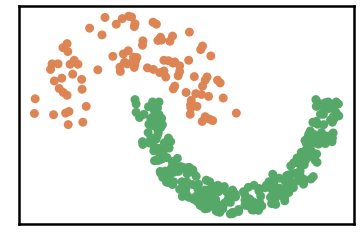

k= 15 :Validity score is: 1.0 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.005189418792724609  seconds


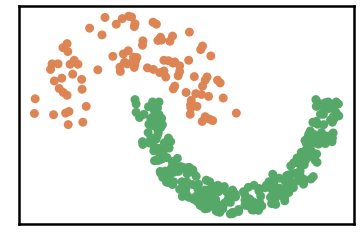

k= 16 :Validity score is: 1.0 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.005271434783935547  seconds


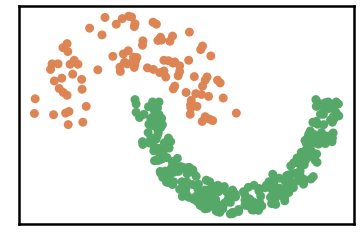

k= 17 :Validity score is: 1.0 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009274959564208984  seconds


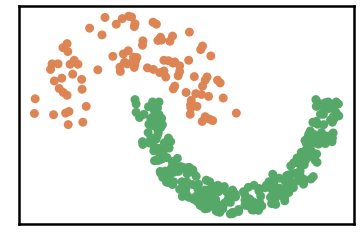

k= 18 :Validity score is: 1.0 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.0057373046875  seconds


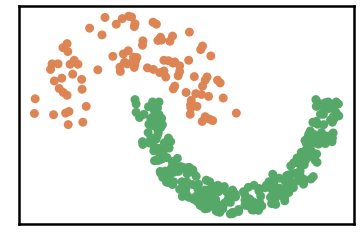

k= 19 :Validity score is: 1.0 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.005963325500488281  seconds


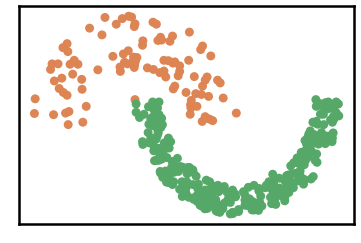

k= 20 :Validity score is: 0.9973234763044174 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.006073951721191406  seconds


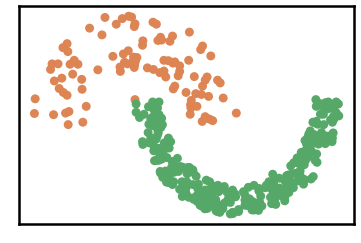

k= 21 :Validity score is: 0.9973234763044174 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.0065381526947021484  seconds


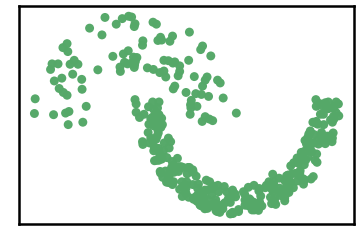

k= 22 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.006416797637939453  seconds


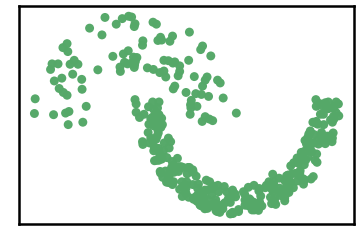

k= 23 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.007112264633178711  seconds


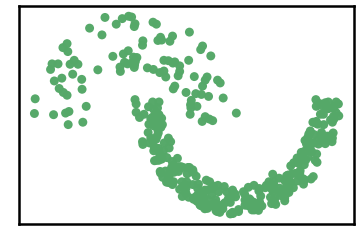

k= 24 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.00719141960144043  seconds


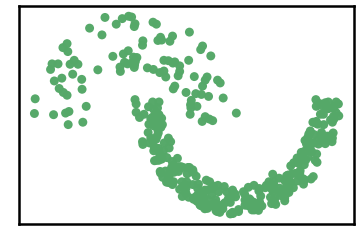

k= 25 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.007302284240722656  seconds


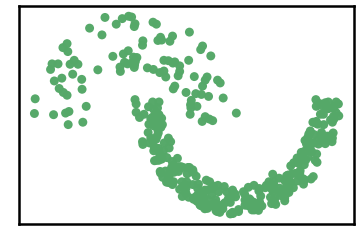

k= 26 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.0074367523193359375  seconds


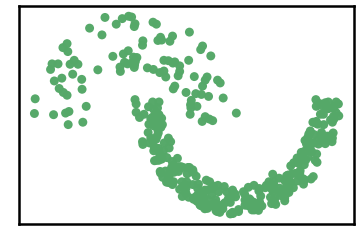

k= 27 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.008892297744750977  seconds


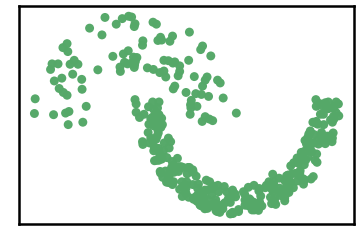

k= 28 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.007658243179321289  seconds


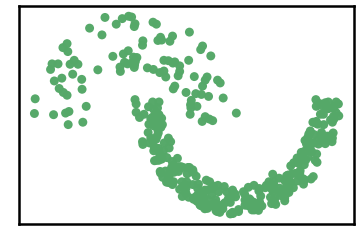

k= 29 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.06604576110839844  seconds


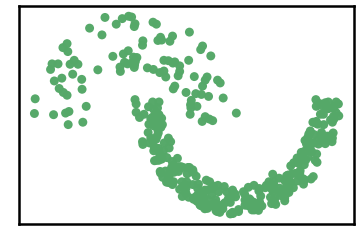

k= 30 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.008031845092773438  seconds


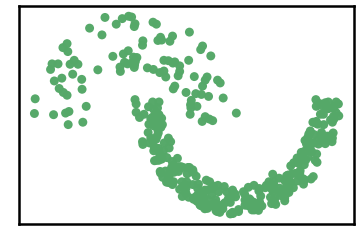

k= 31 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.008435249328613281  seconds


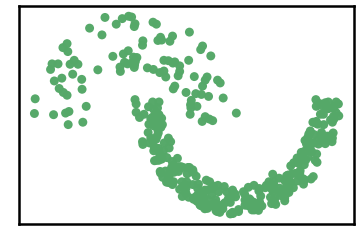

k= 32 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.00815272331237793  seconds


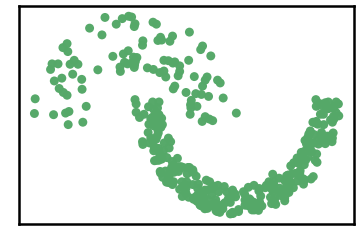

k= 33 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.008320808410644531  seconds


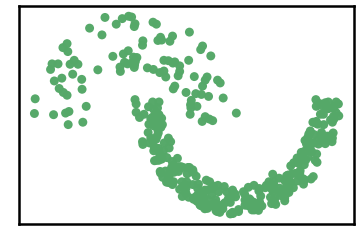

k= 34 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009404659271240234  seconds


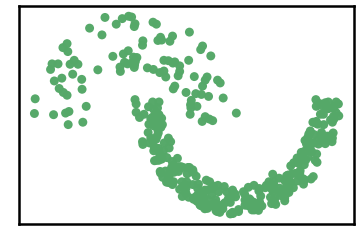

k= 35 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.06493902206420898  seconds


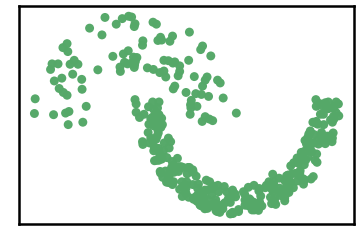

k= 36 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.008604288101196289  seconds


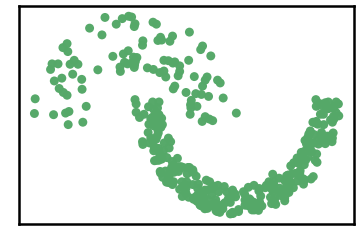

k= 37 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.008901834487915039  seconds


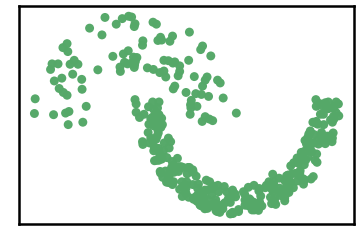

k= 38 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009155035018920898  seconds


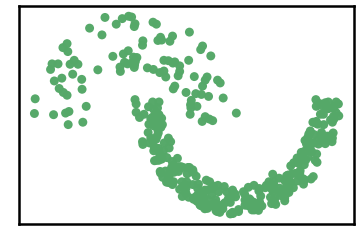

k= 39 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009168863296508789  seconds


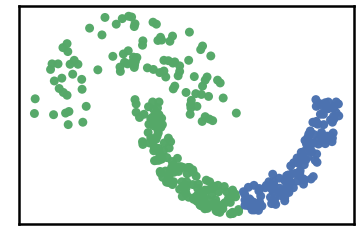

k= 40 :Validity score is: 0.41425569575703625 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009278535842895508  seconds


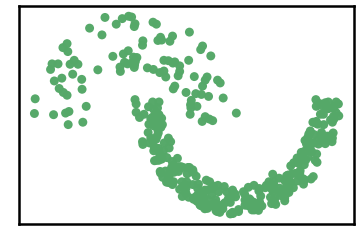

k= 41 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009414911270141602  seconds


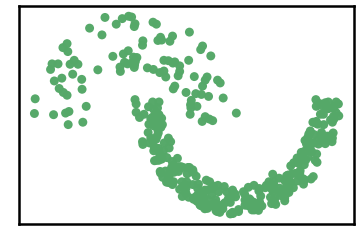

k= 42 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.07041049003601074  seconds


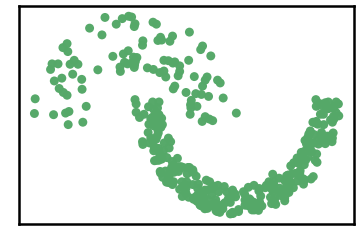

k= 43 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009849309921264648  seconds


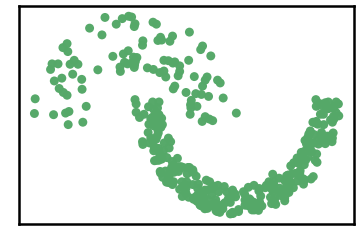

k= 44 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.009990215301513672  seconds


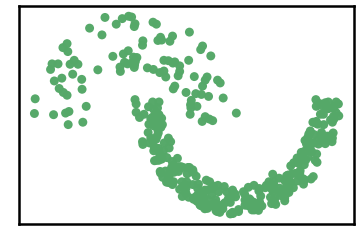

k= 45 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.07062315940856934  seconds


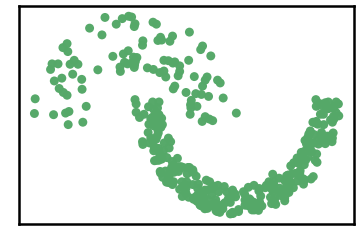

k= 46 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.010598897933959961  seconds


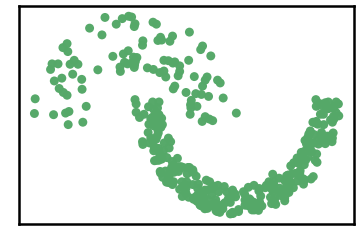

k= 47 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.01067805290222168  seconds


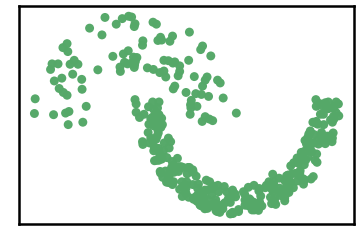

k= 48 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.08158111572265625  seconds


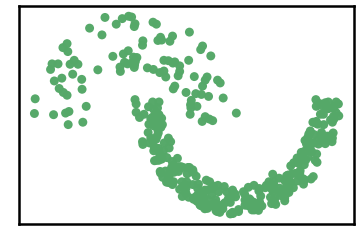

k= 49 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 

using NGT, Proximity matrix has been calculated  in:  0.010805606842041016  seconds


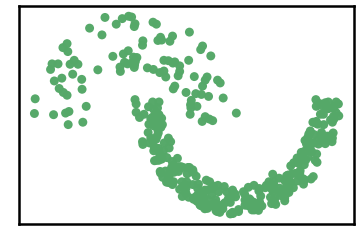

k= 50 :Validity score is: 0.6293534701768445 but best score is 1.0 where k= 15     
' ==================================================================================================== 



<Figure size 432x288 with 0 Axes>

In [2]:
verpose_mode = True
dataset = 'jain' # let us take Jain dataset, a synthetic datset as an example
data_path = 'data/' #change it to whatever you put your data, set it to ''; so it will retrive from current folder

start = step = best_k = 1
end = max_knn  = 50
best_val =  validity_val = 0

validity_idx = 2 # F1-score,  1 for ACC, 3 for NMI and so on
df = pd.DataFrame(columns =['K', 'ACC', 'F1', 'NMI', 'AMI', 'ARI','Homogeneity', 'Completeness', 'Time' ])

for n in range(start, end+1, step):
    start = time.time()
    py = DenMune(dataset=dataset, k_nearest=n, data_path=data_path, verpose=verpose_mode)
    labels_true, labels_pred = py.output_Clusters()
    end = time.time()
    validity_indexes = py.validate_Clusters(labels_true, labels_pred)
    validity_val = validity_indexes[validity_idx]
    validity_indexes[0] = n
    validity_indexes[8] = end - start
    
    df = df.append(pd.Series(validity_indexes, index=df.columns ), ignore_index=True)
    
    if (best_val < validity_val):
        best_val = validity_val
        best_k = n
        
    print ('k=' , n, ':Validity score is:', validity_val , 'but best score is', best_val, 'where k=', best_k , end='     ')
    if not verpose_mode:
        print('\r', end='')
    else:
        print('\n\'', "=====" * 20 , '\n')
    
        

In [3]:
df

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
0,1.0,100.0,0.361832,1.734475e-01,8.993386e-02,0.006586,6.514279e-01,0.100042,0.092972
1,2.0,24.0,0.114204,2.008949e-01,1.558482e-01,0.008054,8.218296e-01,0.114434,0.078515
2,3.0,32.0,0.155521,2.366475e-01,2.108969e-01,0.023152,8.843280e-01,0.136601,0.092628
3,4.0,75.0,0.334304,2.816860e-01,2.643110e-01,0.060173,9.136383e-01,0.166512,0.149987
4,5.0,73.0,0.325282,3.333239e-01,3.234215e-01,0.087609,9.620618e-01,0.201583,0.078990
5,6.0,123.0,0.494793,3.820279e-01,3.741651e-01,0.156875,9.756023e-01,0.237518,0.079974
6,7.0,136.0,0.530347,4.035206e-01,3.966290e-01,0.197021,9.573161e-01,0.255637,0.081940
7,8.0,136.0,0.530347,4.045306e-01,3.976473e-01,0.197351,9.594818e-01,0.256294,0.086105
8,9.0,147.0,0.565093,4.444696e-01,4.387819e-01,0.229592,9.776380e-01,0.287615,0.089531
9,10.0,147.0,0.565093,4.554026e-01,4.503505e-01,0.235531,9.776380e-01,0.296838,0.154508


In [4]:
# It is time to save the results
para_file = 'results/denmune'+ '_para_'  + dataset + '.csv'
df.sort_values(by=['F1', 'NMI', 'ARI'] , ascending=False, inplace=True)   
df.to_csv(para_file, index=False, sep='\t', header=True)

In [5]:
df # it is sorted now and saved

,K,ACC,F1,NMI,AMI,ARI,Homogeneity,Completeness,Time
14,15.0,373.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,0.095745
15,16.0,373.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,0.097624
16,17.0,373.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,0.164160
17,18.0,373.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,0.126137
18,19.0,373.0,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000,0.111770
19,20.0,372.0,0.997323,9.715376e-01,9.714705e-01,0.988701,9.738980e-01,0.969189,0.166713
20,21.0,372.0,0.997323,9.715376e-01,9.714705e-01,0.988701,9.738980e-01,0.969189,0.112665
10,11.0,342.0,0.952554,8.381680e-01,8.367551e-01,0.910509,1.000000e+00,0.721419,0.092757
11,12.0,342.0,0.952554,8.381680e-01,8.367551e-01,0.910509,1.000000e+00,0.721419,0.091696
13,14.0,340.0,0.946697,8.436300e-01,8.426351e-01,0.931329,1.000000e+00,0.729550,0.095652
